Collatz graph notebook

In [7]:
"""
This notebook analyses collatz sequences from a graph theoretical perspective. The script
starts with a specific number and calculates it's predecessors in a collatz sequence 
with the help of a deterministic formula. As a result the constructed tree is plotted. 
"""

# Imports
import warnings
from pathlib import Path, PurePath
import pandas as pd
from matplotlib import pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
from collatz import commons, graph

# Configuration
pd.set_option('display.expand_frame_repr', False)
warnings.filterwarnings('ignore')

START_VALUE = 13
K_FACTOR = 3
PREDECESSOR_COUNT = 3
ITERATION_COUNT = 3
SHOW_LABELS = True

EXPORT_DATA = False
DATA_PATH = Path.cwd().parent.as_posix() + "/data/"
PIC_PATH = DATA_PATH + "graph.png"
CSV_PATH = DATA_PATH + "graph.csv"

# Create collatz graph
graph_frame = graph.create_collatz_graph(
    START_VALUE, k=K_FACTOR, predecessor_count=PREDECESSOR_COUNT, 
    iteration_count=ITERATION_COUNT)

graph_frame["p_binary"] = graph_frame["predecessor"].apply(commons.to_binary)
graph_frame["s_mod_k"] = graph_frame["successor"] % K_FACTOR
graph_frame["alpha"] = graph_frame["predecessor"] * K_FACTOR + 1
graph_frame["alpha"] = graph_frame["alpha"].apply(commons.trailing_zeros)

print("Start value:", START_VALUE, "K:", K_FACTOR, "\n")
print(graph_frame)

Start value: 13 K: 3 

    iteration  successor  predecessor          p_binary  s_mod_k  alpha
0           1         13           17             10001        1    2.0
1           1         13           69           1000101        1    4.0
2           1         13          277         100010101        1    6.0
3           2         17           11              1011        2    1.0
4           2         17           45            101101        2    3.0
5           2         17          181          10110101        2    5.0
6           2        277          369         101110001        1    2.0
7           2        277         1477       10111000101        1    4.0
8           2        277         5909     1011100010101        1    6.0
9           3         11            7               111        2    1.0
10          3         11           29             11101        2    3.0
11          3         11          117           1110101        2    5.0
12          3        181          241    

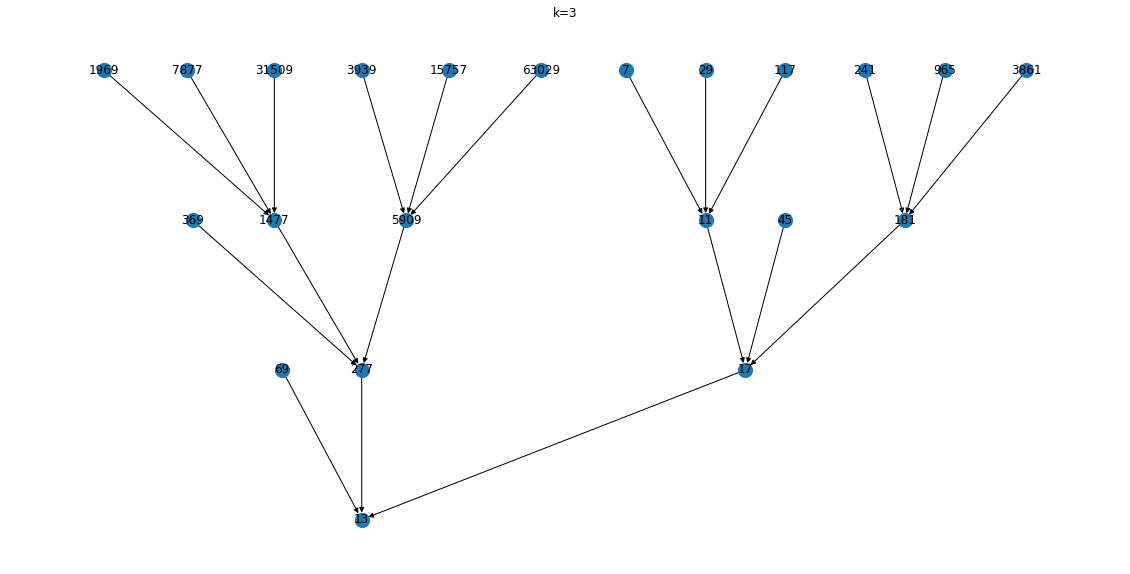

In [8]:
# Create graph
plt.figure(figsize=(20,10))
plt.title("k=" + str(K_FACTOR))

network = nx.convert_matrix.from_pandas_edgelist(
    graph_frame, source="predecessor", target="successor",
    create_using=nx.DiGraph())

pos = graphviz_layout(network, prog='dot')
nx.draw(network, pos, node_size=200, with_labels=SHOW_LABELS, arrows=True)

# Export data
if EXPORT_DATA:
    plt.savefig(PIC_PATH)
    graph_frame.to_csv(CSV_PATH, index=False)
    print("Graph saved:" + PIC_PATH)


# Show graph
plt.show()